In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movie.csv')


In [2]:
# Now let's take a look at the data

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
1,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
2,317000000.0,Walt Disney Pictures,United States,Rian Johnson,Action,1.332699e+09,Star Wars: Episode VIII - The Last Jedi,PG-13,"December 15, 2017 (United States)",152.0,7.0,Daisy Ridley,581000.0,Rian Johnson,2017
3,300000000.0,Warner Bros.,United States,Zack Snyder,Action,6.579270e+08,Justice League,PG-13,"November 17, 2017 (United States)",120.0,6.1,Ben Affleck,418000.0,Jerry Siegel,2017
4,300000000.0,Walt Disney Pictures,United States,Gore Verbinski,Action,9.609965e+08,Pirates of the Caribbean: at World's End,PG-13,"May 25, 2007 (United States)",169.0,7.1,Johnny Depp,608000.0,Ted Elliott,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 28%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 2%
name - 0%
rating - 1%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


<AxesSubplot:>

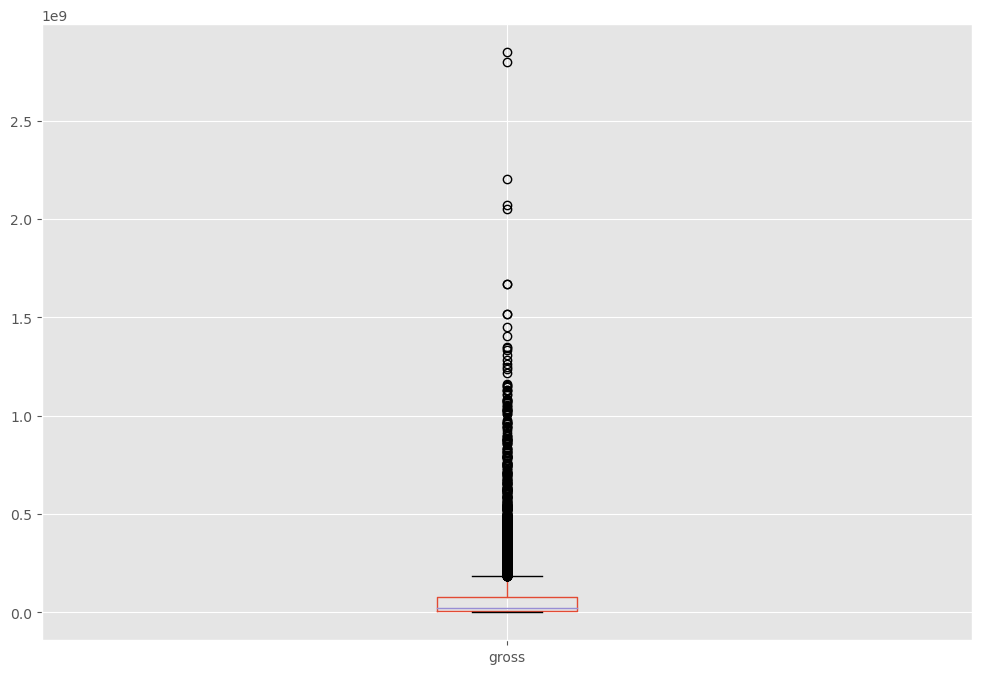

In [5]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [6]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
1,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
2,317000000.0,Walt Disney Pictures,United States,Rian Johnson,Action,1.332699e+09,Star Wars: Episode VIII - The Last Jedi,PG-13,"December 15, 2017 (United States)",152.0,7.0,Daisy Ridley,581000.0,Rian Johnson,2017
3,300000000.0,Warner Bros.,United States,Zack Snyder,Action,6.579270e+08,Justice League,PG-13,"November 17, 2017 (United States)",120.0,6.1,Ben Affleck,418000.0,Jerry Siegel,2017
4,300000000.0,Walt Disney Pictures,United States,Gore Verbinski,Action,9.609965e+08,Pirates of the Caribbean: at World's End,PG-13,"May 25, 2007 (United States)",169.0,7.1,Johnny Depp,608000.0,Ted Elliott,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [7]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
28,237000000.0,Twentieth Century Fox,United States,James Cameron,Action,2.847246e+09,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
0,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
127,200000000.0,Twentieth Century Fox,United States,James Cameron,Drama,2.201647e+09,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
22,245000000.0,Lucasfilm,United States,J.J. Abrams,Action,2.069522e+09,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
1,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


<AxesSubplot:xlabel='gross', ylabel='budget'>

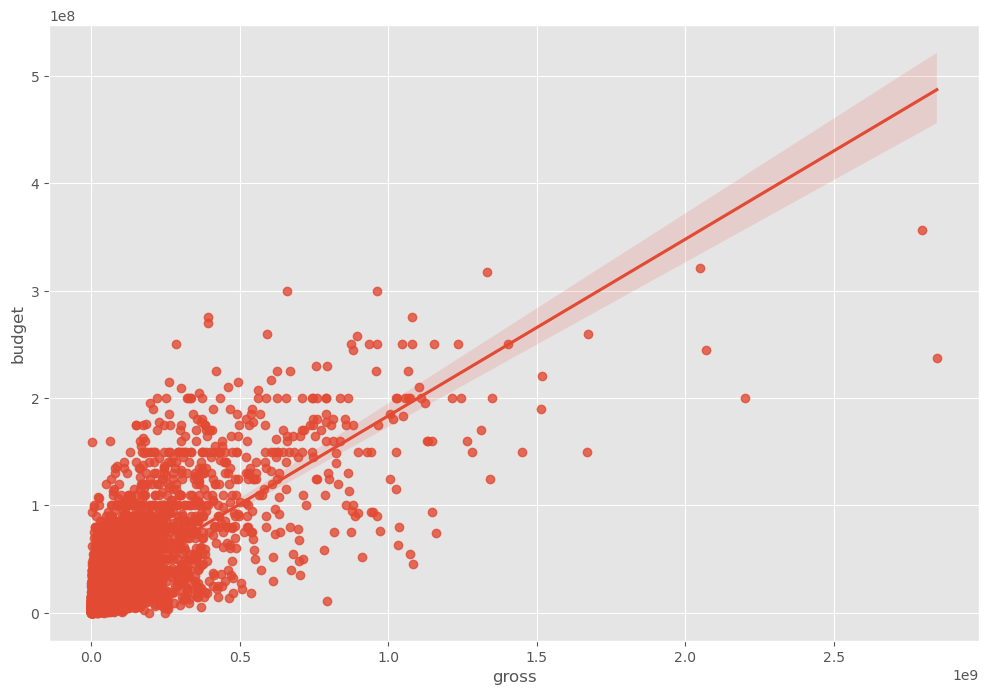

In [8]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

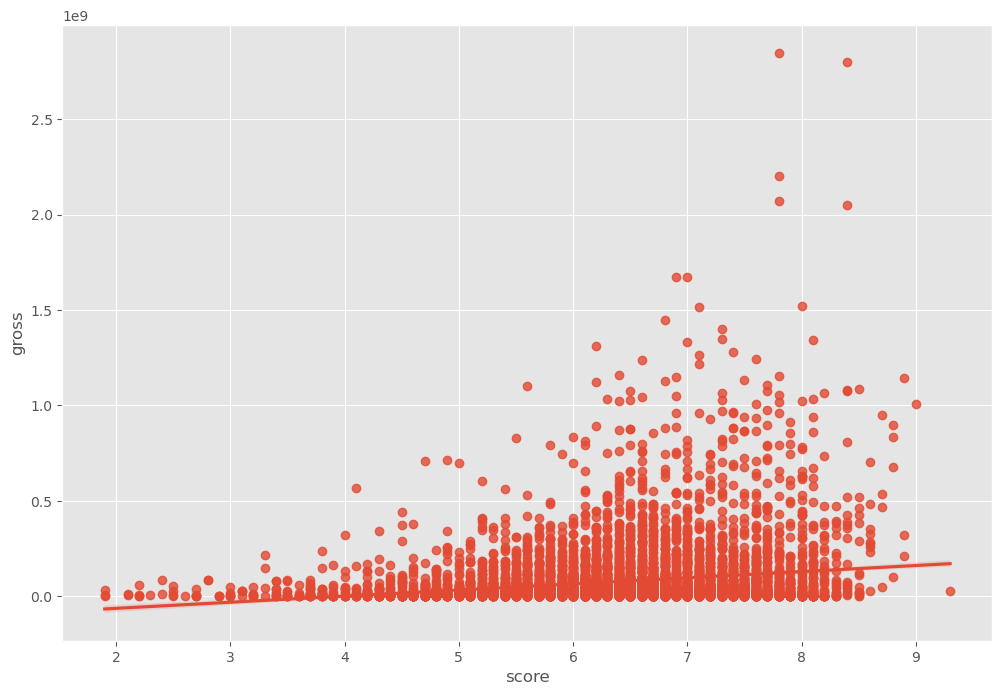

In [9]:
sns.regplot(x="score", y="gross", data=df)

In [10]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [11]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.512637,0.235483,-0.000566,0.353702,0.224120
gross,0.512637,1.000000,0.168933,0.086046,0.548899,0.200618
runtime,0.235483,0.168933,1.000000,0.283611,0.198240,0.097184
score,-0.000566,0.086046,0.283611,1.000000,0.300115,0.067652
votes,0.353702,0.548899,0.198240,0.300115,1.000000,0.331465
year,0.224120,0.200618,0.097184,0.067652,0.331465,1.000000


In [12]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.693670,0.336370,-0.001403,0.502466,0.317336
gross,0.693670,1.000000,0.246243,0.126116,0.742050,0.293084
runtime,0.336370,0.246243,1.000000,0.399857,0.290159,0.142977
score,-0.001403,0.126116,0.399857,1.000000,0.428138,0.099045
votes,0.502466,0.742050,0.290159,0.428138,1.000000,0.469829
year,0.317336,0.293084,0.142977,0.099045,0.469829,1.000000


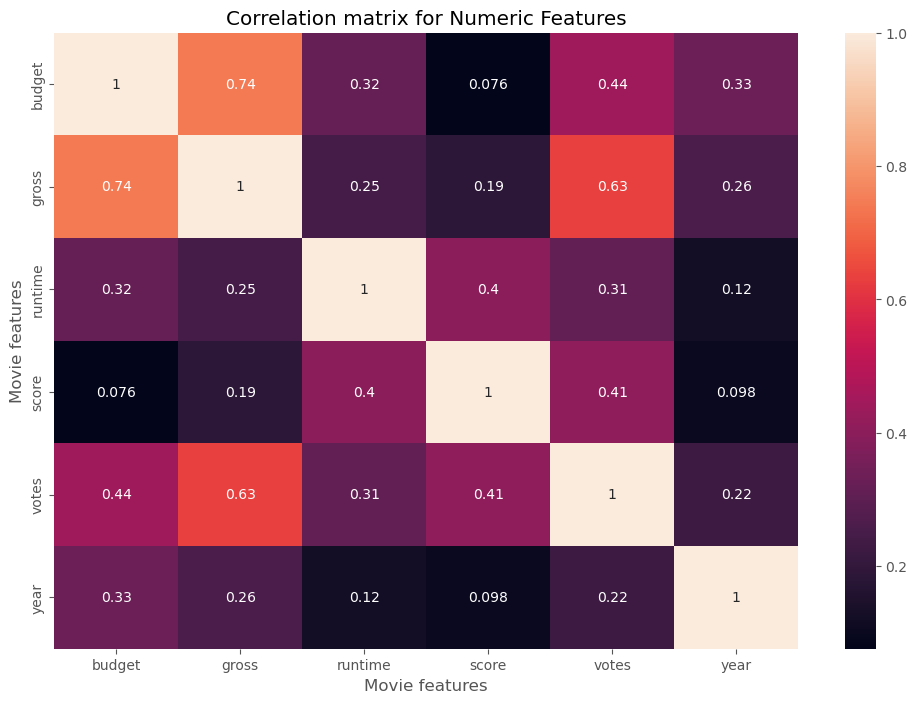

In [13]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [14]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.038646,-0.151007,0.040884,0.034916,0.278236,0.273751,-0.096461,0.091376,0.021303,-0.002421,0.024939,0.120871,0.141832,0.004346
company,-0.038646,1.000000,0.278663,0.525536,0.097265,0.565636,0.582566,0.233319,0.365422,0.004758,-0.011253,0.474109,0.003940,0.520292,-0.212563
country,-0.151007,0.278663,1.000000,0.193588,-0.013407,0.130464,0.139953,0.236228,0.172065,0.045871,-0.002557,0.243013,0.011137,0.183552,-0.104976
director,0.040884,0.525536,0.193588,1.000000,0.089694,0.601040,0.614500,0.156293,0.378803,0.017126,0.031205,0.513097,0.022442,0.620063,-0.223303
genre,0.034916,0.097265,-0.013407,0.089694,1.000000,0.162080,0.169110,0.099853,0.112202,0.001371,-0.029922,0.095559,0.007381,0.115884,0.044108
gross,0.278236,0.565636,0.130464,0.601040,0.162080,1.000000,0.962412,0.179019,0.494279,-0.006184,-0.031903,0.557415,0.041664,0.706428,-0.113248
name,0.273751,0.582566,0.139953,0.614500,0.169110,0.962412,1.000000,0.182344,0.510405,0.003181,-0.026529,0.570950,0.052631,0.717943,-0.106768
rating,-0.096461,0.233319,0.236228,0.156293,0.099853,0.179019,0.182344,1.000000,0.155869,0.041850,-0.016364,0.193797,-0.023615,0.160433,0.024239
released,0.091376,0.365422,0.172065,0.378803,0.112202,0.494279,0.510405,0.155869,1.000000,-0.002221,-0.026336,0.332836,0.066380,0.421183,-0.013014
runtime,0.021303,0.004758,0.045871,0.017126,0.001371,-0.006184,0.003181,0.041850,-0.002221,1.000000,0.032866,0.030116,0.021128,0.006520,0.039539


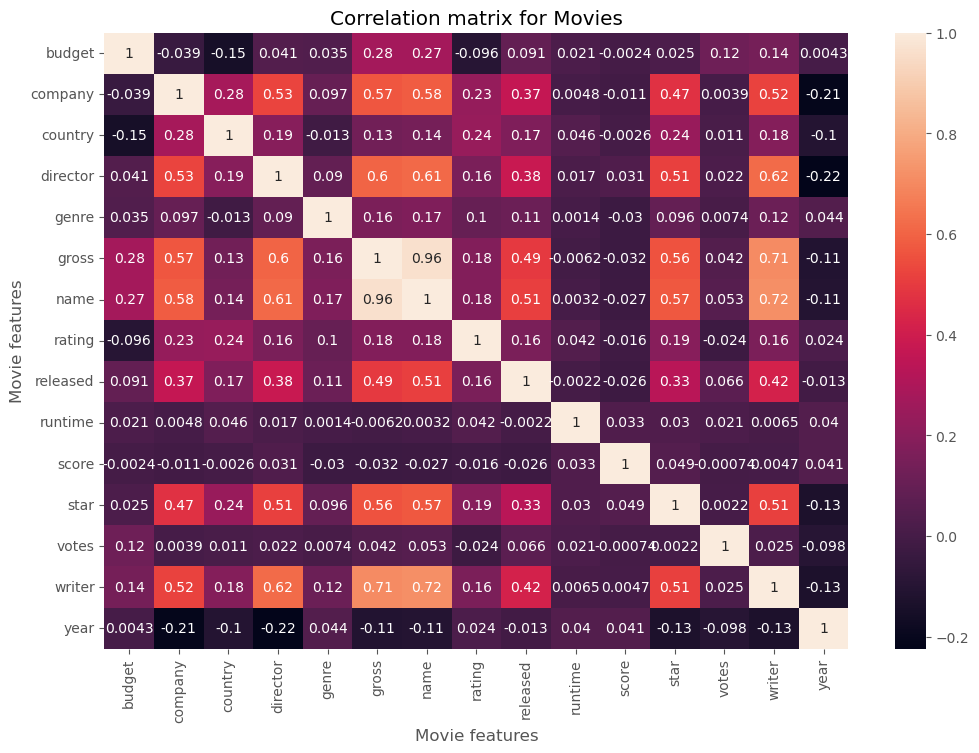

In [15]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company    -0.038646
        country    -0.151007
        director    0.040884
        genre       0.034916
                      ...   
year    score       0.041465
        star       -0.127807
        votes      -0.098071
        writer     -0.129219
        year        1.000000
Length: 225, dtype: float64


In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

director  year       -0.223303
year      director   -0.223303
          company    -0.212563
company   year       -0.212563
budget    country    -0.151007
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [18]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

name      released    0.510405
released  name        0.510405
star      director    0.513097
director  star        0.513097
star      writer      0.514147
writer    star        0.514147
          company     0.520292
company   writer      0.520292
director  company     0.525536
company   director    0.525536
gross     star        0.557415
star      gross       0.557415
gross     company     0.565636
company   gross       0.565636
name      star        0.570950
star      name        0.570950
name      company     0.582566
company   name        0.582566
director  gross       0.601040
gross     director    0.601040
director  name        0.614500
name      director    0.614500
writer    director    0.620063
director  writer      0.620063
writer    gross       0.706428
gross     writer      0.706428
writer    name        0.717943
name      writer      0.717943
gross     name        0.962412
name      gross       0.962412
budget    budget      1.000000
rating    rating      1.000000
votes   

In [19]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [20]:
df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,Apri
1,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,Apri
2,317000000.0,Walt Disney Pictures,United States,Rian Johnson,Action,1.332699e+09,Star Wars: Episode VIII - The Last Jedi,PG-13,"December 15, 2017 (United States)",152.0,7.0,Daisy Ridley,581000.0,Rian Johnson,2017,Dece
3,300000000.0,Warner Bros.,United States,Zack Snyder,Action,6.579270e+08,Justice League,PG-13,"November 17, 2017 (United States)",120.0,6.1,Ben Affleck,418000.0,Jerry Siegel,2017,Nove
4,300000000.0,Walt Disney Pictures,United States,Gore Verbinski,Action,9.609965e+08,Pirates of the Caribbean: at World's End,PG-13,"May 25, 2007 (United States)",169.0,7.1,Johnny Depp,608000.0,Ted Elliott,2007,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,Octo
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,Febr
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020,Apri
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020,Octo


In [21]:


df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [22]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [23]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

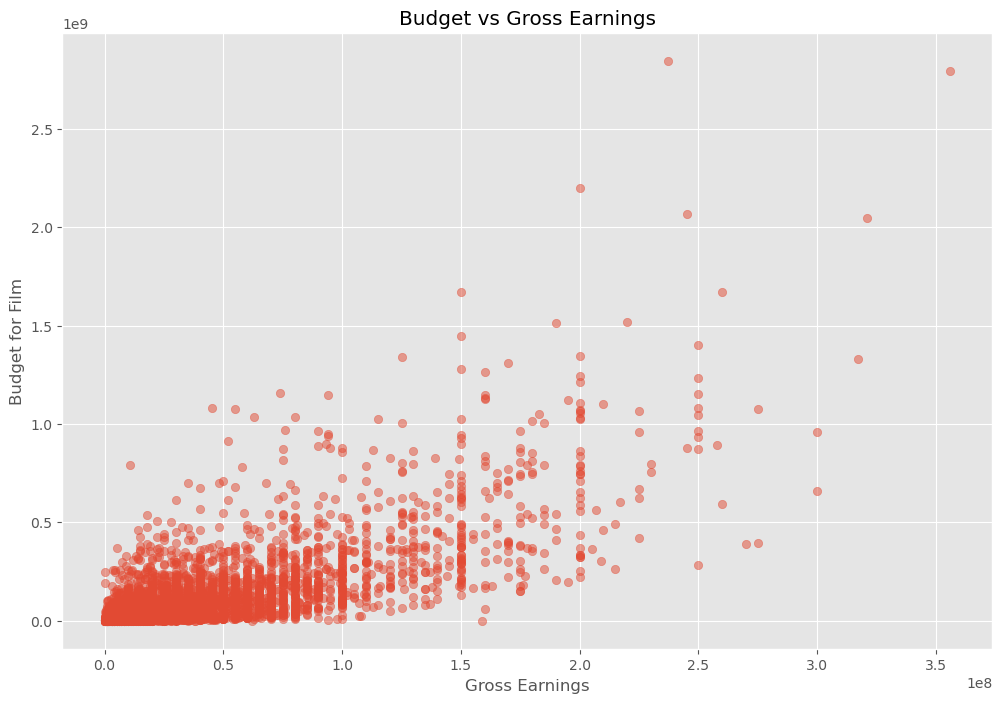

In [24]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [25]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,Apri
1,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,Apri
2,317000000.0,Walt Disney Pictures,United States,Rian Johnson,Action,1.332699e+09,Star Wars: Episode VIII - The Last Jedi,PG-13,"December 15, 2017 (United States)",152.0,7.0,Daisy Ridley,581000.0,Rian Johnson,2017,Dece
3,300000000.0,Warner Bros.,United States,Zack Snyder,Action,6.579270e+08,Justice League,PG-13,"November 17, 2017 (United States)",120.0,6.1,Ben Affleck,418000.0,Jerry Siegel,2017,Nove
4,300000000.0,Walt Disney Pictures,United States,Gore Verbinski,Action,9.609965e+08,Pirates of the Caribbean: at World's End,PG-13,"May 25, 2007 (United States)",169.0,7.1,Johnny Depp,608000.0,Ted Elliott,2007,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,Octo
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,Febr
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020,Apri
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020,Octo


In [26]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,356000000.0,1606,55,162,0,2.797501e+09,535,5,183,181.0,8.4,2241,903000.0,743,2019,8
1,321000000.0,1606,55,162,0,2.048360e+09,536,5,192,149.0,8.4,2241,897000.0,743,2018,8
2,317000000.0,2316,55,2282,0,1.332699e+09,5145,5,661,152.0,7.0,524,581000.0,3518,2017,10
3,300000000.0,2319,55,2936,0,6.579270e+08,2984,5,2604,120.0,6.1,220,418000.0,1979,2017,17
4,300000000.0,2316,55,996,0,9.609965e+08,4260,5,2405,169.0,7.1,1321,608000.0,4147,2007,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,-1,55,1500,6,NaN,3705,-1,2964,90.0,3.1,2421,18.0,2289,2020,18
7664,NaN,539,55,774,4,NaN,1678,-1,1107,90.0,4.7,1886,36.0,2614,2020,11
7665,58750.0,941,55,2061,6,NaN,4717,-1,193,NaN,5.7,2040,29.0,2683,2020,8
7666,15000.0,-1,55,1184,6,NaN,2843,-1,2817,120.0,NaN,450,NaN,1824,2020,18


In [27]:
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
budget,1.000000,0.173214,0.054063,-0.012272,-0.356564,0.740395,0.023970,-0.176002,0.014683,0.320447,0.076254,-0.019589,0.442429,-0.039451,0.329321,0.015682
company,0.173214,1.000000,0.095548,0.004404,-0.071067,0.154840,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431,-0.010726
country,0.054063,0.095548,1.000000,0.017490,-0.037615,0.092129,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938,-0.022277
director,-0.012272,0.004404,0.017490,1.000000,-0.015258,-0.014441,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795,-0.000105
genre,-0.356564,-0.071067,-0.037615,-0.015258,1.000000,-0.235650,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261,0.028397
gross,0.740395,0.154840,0.092129,-0.014441,-0.235650,1.000000,0.005533,-0.107339,0.001659,0.245216,0.186258,-0.002717,0.630757,-0.023519,0.257486,0.002946
name,0.023970,0.009211,-0.010737,0.009079,0.016355,0.005533,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453,-0.011725
rating,-0.176002,-0.032943,0.081244,0.019483,0.072423,-0.107339,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779,0.013475
released,0.014683,-0.010474,-0.020427,-0.001478,0.029822,0.001659,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695,0.993694
runtime,0.320447,0.034402,-0.078412,0.017624,-0.052711,0.245216,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811,0.000410


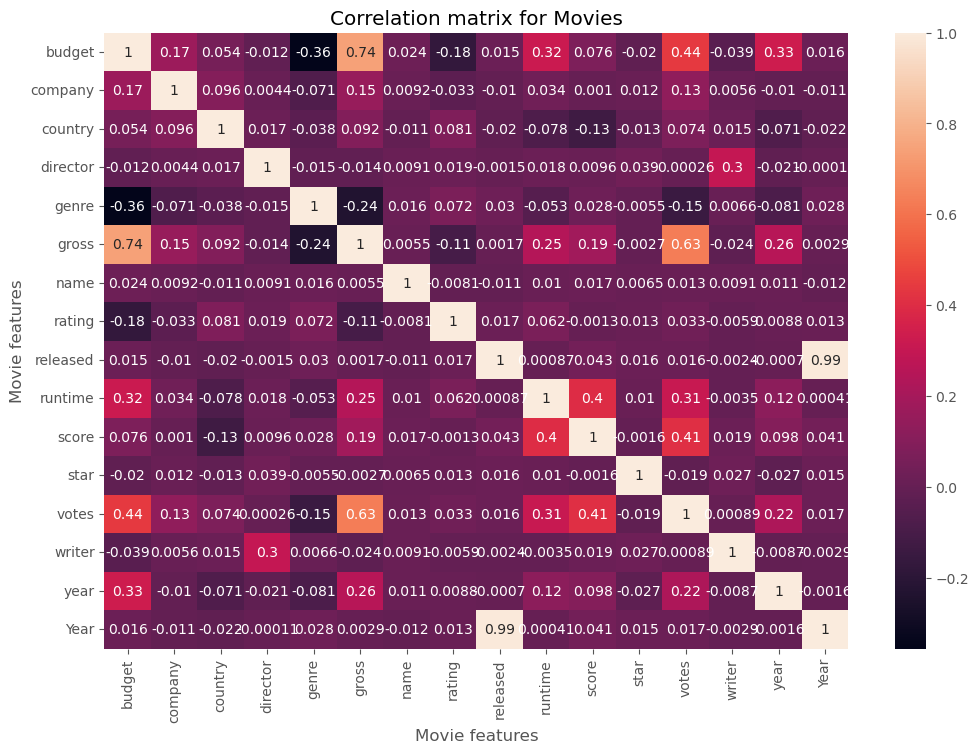

In [28]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [29]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [30]:
import pandas as pd

# Assuming df is your DataFrame

# Identify categorical columns
cat_columns = df.select_dtypes(['object']).columns

# Convert categorical columns to category type
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))

# Convert category codes for categorical columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Now, df contains numerical codes for categorical columns

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,356000000.0,1606,55,162,0,2.797501e+09,535,5,183,181.0,8.4,2241,903000.0,743,2019,8
1,321000000.0,1606,55,162,0,2.048360e+09,536,5,192,149.0,8.4,2241,897000.0,743,2018,8
2,317000000.0,2316,55,2282,0,1.332699e+09,5145,5,661,152.0,7.0,524,581000.0,3518,2017,10
3,300000000.0,2319,55,2936,0,6.579270e+08,2984,5,2604,120.0,6.1,220,418000.0,1979,2017,17
4,300000000.0,2316,55,996,0,9.609965e+08,4260,5,2405,169.0,7.1,1321,608000.0,4147,2007,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,-1,55,1500,6,NaN,3705,-1,2964,90.0,3.1,2421,18.0,2289,2020,18
7664,NaN,539,55,774,4,NaN,1678,-1,1107,90.0,4.7,1886,36.0,2614,2020,11
7665,58750.0,941,55,2061,6,NaN,4717,-1,193,NaN,5.7,2040,29.0,2683,2020,8
7666,15000.0,-1,55,1184,6,NaN,2843,-1,2817,120.0,NaN,450,NaN,1824,2020,18


Text(0.5, 1.0, 'Genres of the most popular films of the last 30 years')

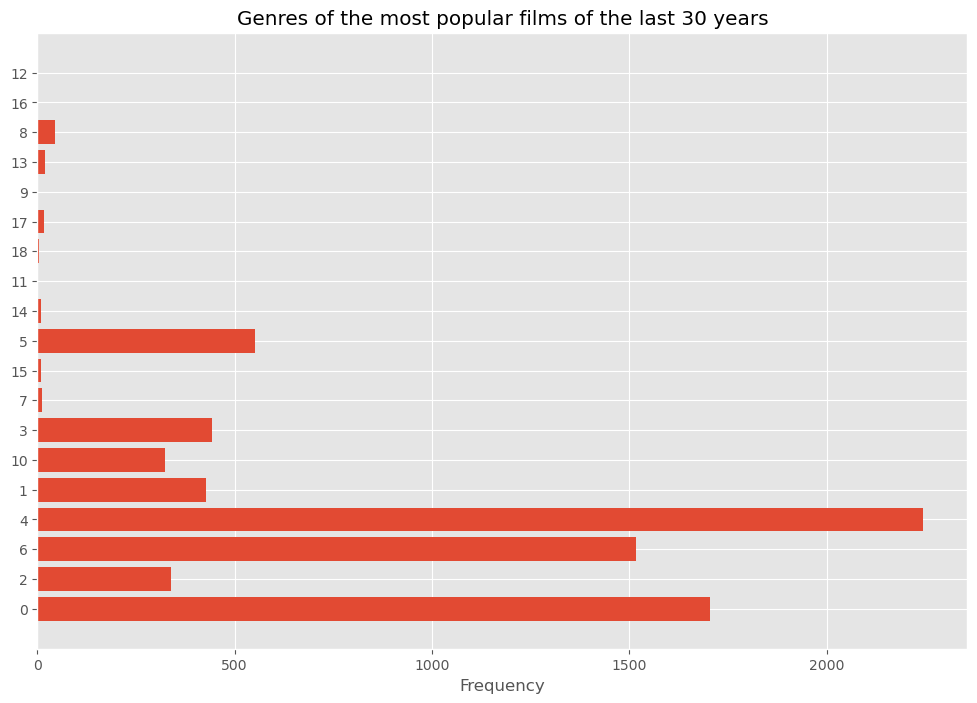

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
# dictionary containing the frequency for each genre
counter = Counter(df['genre'])
genre = list(counter.keys())
freq = list(counter.values())

# positions in the Y-axis for each genre
y_pos = np.arange(len(genre))

# show plot, assign a title and all that stuff
plt.barh(y_pos, freq)
plt.yticks(y_pos, genre)
plt.xlabel('Frequency')
plt.title('Genres of the most popular films of the last 30 years')

Text(0.5, 1.0, 'Average movie revenue over the years')

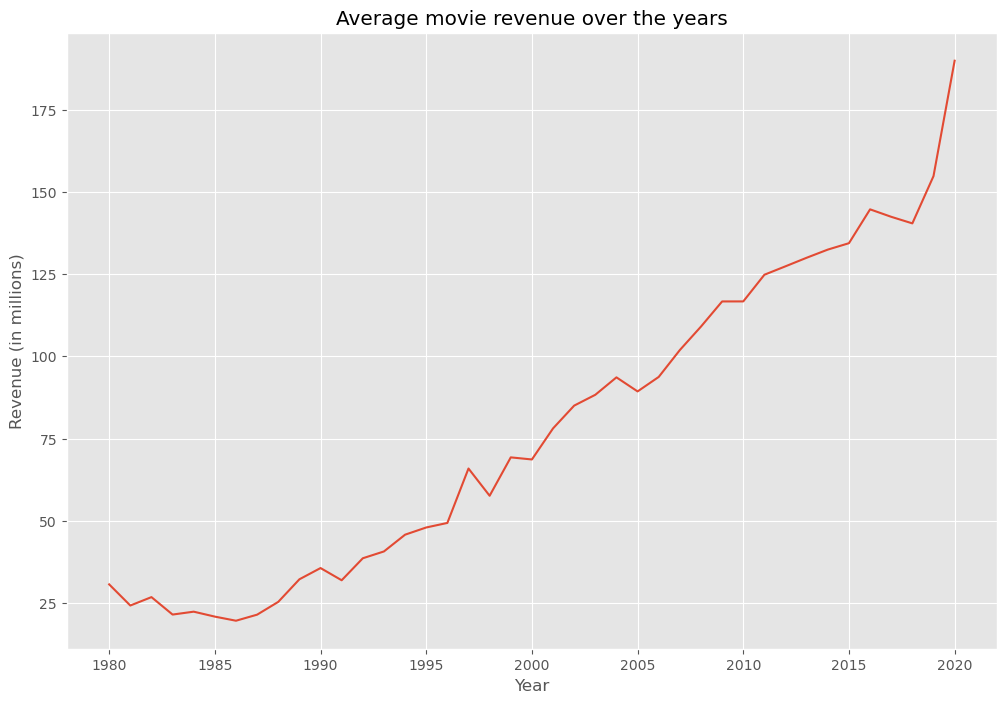

In [32]:
# BONUS: let's visualize movie revenue over the years

# list of years in the dataset (1986-2016)
year = sorted(pd.unique(df['year']))

# calculate average gross for a movie in each year
avg_gross = [np.mean(df[df['year']==year]['gross'])/1000000 for year in year]

# plot and stuff
plt.plot(year, avg_gross)
plt.ylabel('Revenue (in millions)')
plt.xlabel('Year')
plt.title('Average movie revenue over the years')

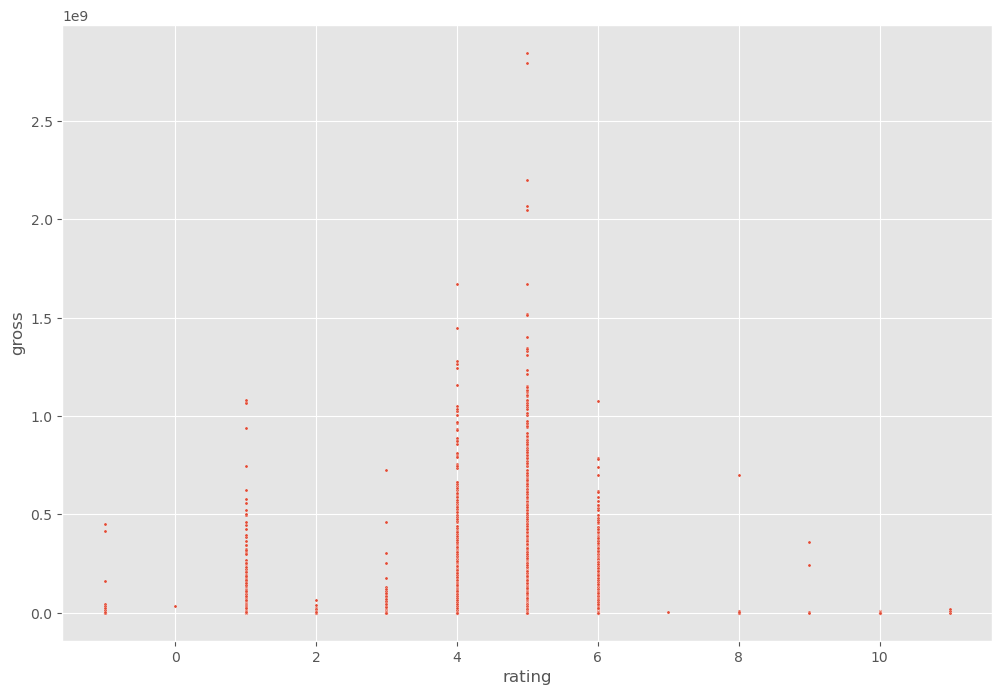

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.scatterplot(x='rating', y='gross', data=df, marker='o', s=5)  # Adjust 's' parameter for marker size
plt.show()


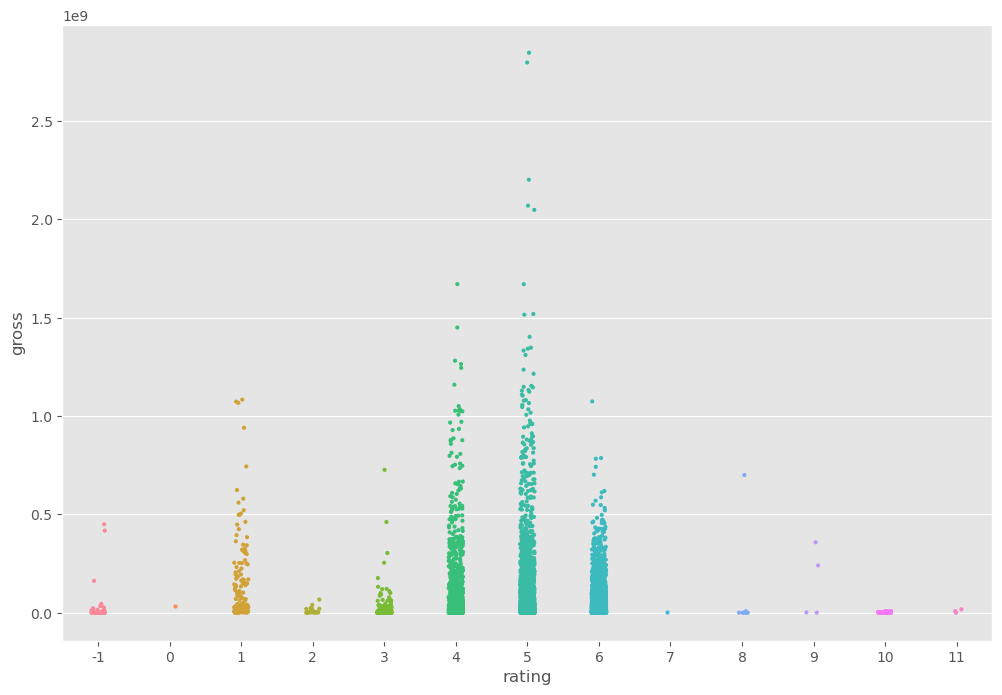

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.stripplot(x='rating', y='gross', data=df, size=3)  # Adjust 'size' parameter for marker size
plt.show()
